In [2]:
from numpy import *
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
init_printing(use_unicode=True)

## np.linalg.solve求解线性方程组Ax=b

$A=\begin{bmatrix}1 & -3 \\3 & 5 \end{bmatrix}\\b=\begin{bmatrix}3 \\ 2 \end{bmatrix}$

In [3]:
A = np.array([[1, -3], [3, 5]])    #无法求解含有自由变量的方程
b = np.array([3, 2]).T
x = np.linalg.solve(A, b)
x

array([ 1.5, -0.5])

In [4]:
solve(x + 2 * (x ** 2) + 3 * (x ** 3) - 6, x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
A.dot(x)

array([ 3.,  2.])

In [6]:
np.allclose(np.dot(A, x), b)

True

## QR分解

In [50]:
%%time
A = Matrix([[12, -51, 4], [6, 167, -68], [-4, 24, -41]])
q, r = linalg.qr(A)
print(q)
print(r)

[[-0.85714286  0.39428571  0.33142857]
 [-0.42857143 -0.90285714 -0.03428571]
 [ 0.28571429 -0.17142857  0.94285714]]
[[ -14.  -21.   14.]
 [   0. -175.   70.]
 [   0.    0.  -35.]]
Wall time: 3 ms


In [51]:
Q, R = A.QRdecomposition()
Q,R

⎛⎡      -69   -58  ⎤                ⎞
⎜⎢6/7   ────  ──── ⎥                ⎟
⎜⎢      175   175  ⎥                ⎟
⎜⎢                 ⎥  ⎡14  21   -14⎤⎟
⎜⎢      158        ⎥  ⎢            ⎥⎟
⎜⎢3/7   ───   6/175⎥, ⎢0   175  -70⎥⎟
⎜⎢      175        ⎥  ⎢            ⎥⎟
⎜⎢                 ⎥  ⎣0    0   35 ⎦⎟
⎜⎢            -33  ⎥                ⎟
⎜⎢-2/7  6/35  ──── ⎥                ⎟
⎝⎣             35  ⎦                ⎠

## LU分解

In [52]:
L, U, _ = A.LUdecomposition()
L, U, _

⎛                 ⎡12   -51     4   ⎤    ⎞
⎜⎡ 1     0    0⎤  ⎢                 ⎥    ⎟
⎜⎢             ⎥  ⎢0   385/2   -70  ⎥    ⎟
⎜⎢1/2    1    0⎥, ⎢                 ⎥, []⎟
⎜⎢             ⎥  ⎢           -1225 ⎥    ⎟
⎜⎣-1/3  2/55  1⎦  ⎢0     0    ──────⎥    ⎟
⎝                 ⎣             33  ⎦    ⎠

## 2.点乘

In [24]:
np.dot([2j, 3j], [2j, 3j])

(-13+0j)

In [28]:
a = np.arange(3*4*5*6).reshape((3,4,5,6))
b = np.arange(3*4*5*6)[::-1].reshape((5,4,6,3))
np.dot(a, b)[2,3,2,1,2,2]

499128

In [43]:
a = np.array([[1, 0, -2], [-2, 1, 6], [3, -2, -5]])
u = np.array([[-1, 7, -3], [-2, 1, 6], [3, -2, -5]]).T
a.dot(u)

array([[  5, -14,  13],
       [ -9,  41, -38],
       [ -2, -38,  38]])

In [44]:
a = np.array([[4, -6], [1, 1]])
u = np.array([3, 1]).T
a.dot(u)

array([6, 4])

## sympy中Matrix进行矩阵化简

In [8]:
A = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A.rref()

⎛⎡1  0  -1⎤        ⎞
⎜⎢        ⎥        ⎟
⎜⎢0  1  2 ⎥, (0, 1)⎟
⎜⎢        ⎥        ⎟
⎝⎣0  0  0 ⎦        ⎠

In [9]:
Nu = Matrix([[36, 51, 13, 33], [52, 34, 74, 45], [0, 7, 1.1, 3]])
Nu.rref()

⎛⎡1  0  0  0.277223183614433⎤           ⎞
⎜⎢                          ⎥           ⎟
⎜⎢0  1  0  0.391920861637007⎥, (0, 1, 2)⎟
⎜⎢                          ⎥           ⎟
⎝⎣0  0  1  0.233230880491774⎦           ⎠

In [35]:
A = np.array([[2, 3], [1, -5]])
B = np.array([[4, 3, 6], [1, -2, 3]])
A.dot(B)

array([[11,  0, 21],
       [-1, 13, -9]])

### 列昂惕夫投入产出模型，最终需求是制造业50单位，农业30单位，服务业20单位

$C=\begin{bmatrix}0.50 & 0.50 & 0.20 \\0.20 & 0.30 & 0.10 \\0.10 & 0.10 & 0.30 \end{bmatrix}$

In [19]:
C = Matrix([[0.50, 0.40, 0.20], [0.2, 0.3, 0.1], [0.1, 0.1, 0.3]])
M = np.eye(3) - C
M

⎡0.5   -0.4  -0.2⎤
⎢                ⎥
⎢-0.2  0.7   -0.1⎥
⎢                ⎥
⎣-0.1  -0.1  0.7 ⎦

In [20]:
M.col_insert(3, Matrix([[50], [30], [20]]))    #调用col_insert构造增广阵

⎡0.5   -0.4  -0.2  50⎤
⎢                    ⎥
⎢-0.2  0.7   -0.1  30⎥
⎢                    ⎥
⎣-0.1  -0.1  0.7   20⎦

In [21]:
M.col_insert(3, Matrix([[50], [30], [20]])).rref()

⎛⎡1  0  0  225.925925925926⎤           ⎞
⎜⎢                         ⎥           ⎟
⎜⎢0  1  0  118.518518518519⎥, (0, 1, 2)⎟
⎜⎢                         ⎥           ⎟
⎝⎣0  0  1  77.7777777777778⎦           ⎠

In [22]:
A = Matrix([[-3, 6, -1, 1, -7], [1, -2, 2, 3, -1], [2, -4, 5, 8, -4]])
A_new = A.col_insert(5, Matrix([[0], [0], [0]])) 
A_new.rref()
#  NulA维数是自由变量个数3，ColA维数是主元列个数2

⎛⎡1  -2  0  -1  3   0⎤        ⎞
⎜⎢                   ⎥        ⎟
⎜⎢0  0   1  2   -2  0⎥, (0, 2)⎟
⎜⎢                   ⎥        ⎟
⎝⎣0  0   0  0   0   0⎦        ⎠

## 矩阵求逆

In [16]:
A = np.array([[1, -2, -1], [-1, 5, 6], [5, -4, 5]])
np.linalg.inv(A)

LinAlgError: Singular matrix

In [20]:
%%time
from numpy.linalg import inv
B = np.array([[4, -9], [0, 5]])
inv(B)

Wall time: 0 ns


In [31]:
%%time
B = Matrix([[4, -9], [0, 5]])
B ** (-1)

Wall time: 0 ns


## 求行列式

In [42]:
%%time
M = np.array([[5, -7, 2, 2], [0, 3, 0, -4], [-5, -8, 0, 3], [0, 5, 0, -6]])
print(np.linalg.det(M))

20.0
Wall time: 999 µs


## 矩阵求秩 rank

In [24]:
I=np.eye(4)
print(I)
np.linalg.matrix_rank(I)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


4

In [25]:
I[-1,-1] = 0.
print(I)
np.linalg.matrix_rank(I)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


3

## 求零空间 sympy

In [23]:
M = Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])
M.nullspace()

⎡⎡-15⎤  ⎡0⎤  ⎡ 1  ⎤⎤
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 6 ⎥  ⎢0⎥  ⎢-1/2⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 1 ⎥, ⎢0⎥, ⎢ 0  ⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 0 ⎥  ⎢1⎥  ⎢ 0  ⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎣⎣ 0 ⎦  ⎣0⎦  ⎣ 1  ⎦⎦

## 求列空间 sympy

In [26]:
M = Matrix([[1, 1, 2], [2 ,1 , 3], [3 , 1, 4]])
M.columnspace()

⎡⎡1⎤  ⎡1⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢2⎥, ⎢1⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣3⎦  ⎣1⎦⎦

## 矩阵求迹

In [10]:
np.trace(np.eye(3))

In [45]:
a = np.arange(8).reshape((2,2,2))
a

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [46]:
np.trace(a)

array([6, 8])

## 求马尔科夫过程稳态矩阵 sympy

In [47]:
P = Matrix([[0.6, 0.2], [0.4, 0.8]])
P_I = P - np.eye(2)
P_I.col_insert(2, Matrix([[0], [0]]))

⎡-0.4  0.2   0⎤
⎢             ⎥
⎣0.4   -0.2  0⎦

## 求取特征向量和特征值

In [67]:
A = np.array([[0.95, 0.03], [0.05, 0.97]])
print(np.linalg.eig(A))

(array([ 0.92,  1.  ]), array([[-0.70710678, -0.51449576],
       [ 0.70710678, -0.85749293]]))


In [64]:
type(np.linalg.eig(A))    #[0]为特征值，[1]为特征向量

tuple

In [56]:
np.linalg.eigvals(A)    #只要特征值

array([ 0.4,  1. ])

In [15]:
B = np.diag((1, 2, 3))
np.linalg.eig(B)

(array([ 1.,  2.,  3.]), array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]))

In [6]:
M = np.array([[6, -2, -1], [-2, 6, -1], [-1, -1, 5]])
cancel(Matrix(np.linalg.eig(M)[1]))

⎡0.577350269189626    0.707106781186548    -0.408248290463863⎤
⎢                                                            ⎥
⎢0.577350269189626   -0.707106781186547    -0.408248290463863⎥
⎢                                                            ⎥
⎣0.577350269189626  -2.78349283580232e-16  0.816496580927726 ⎦

### 复特征值的迭代展示

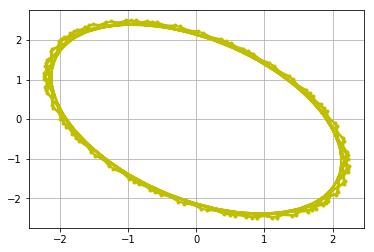

In [99]:
A = Matrix([[0.5, -0.6], [0.75, 1.1]])
A_new = A.dot(Matrix([2, 0]))
A_new_x = []
A_new_y = []
fig = plt.figure() 
for i in range(100):
    A_new = A.dot(A_new)
    A_new_x.append(A.dot(A_new)[0])
    A_new_y.append(A.dot(A_new)[1])
plt.plot(A_new_x,A_new_y, 'y.-')
plt.grid(True)
plt.show()

## 动力系统绘制

#### 吸引子

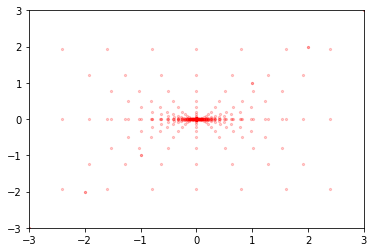

In [117]:
A = np.array([[0.8, 0], [0, 0.64]])
diag_m = np.diag(linalg.eig(A)[0])    #特征值对角化
def dynamic_sys(x, y):
    A_new_x = []
    A_new_y = []
    g = (i for i in range(100))
    for n in g:
        A_new = np.array([x, y]).dot(diag_m ** n).dot(linalg.eig(A)[1])
        plt.scatter(A_new[0], A_new[1], s = 5, c = 'r',alpha = 0.2)
        
def iterate():
    g = ((x,y) for x in range(-3, 4) for y in (-3, 0, 3))
    for n in g:
        dynamic_sys(n[0], n[1])

fig = plt.figure()
iterate()
plt.xlim((-3, 3))
plt.ylim((-3, 3))
plt.show()

#### 排斥子

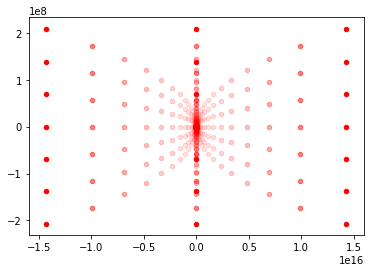

In [124]:
B = np.array([[1.44, 0], [0, 1.2]])
diag_m = np.diag(linalg.eig(B)[0])    #特征值对角化
def dynamic_sys(x, y):
    B_new_x = []
    B_new_y = []
    g = (i for i in range(100))
    for n in g:
        B_new = np.array([x, y]).dot(diag_m ** n).dot(linalg.eig(B)[1])
        plt.scatter(B_new[0], B_new[1], s = 20, c = 'r', alpha = 1 / (100 - n))
        
def iterate():
    g = ((x,y) for y in range(-3, 4) for x in (-3, 0, 3))
    for n in g:
        dynamic_sys(n[0], n[1])

fig = plt.figure()
iterate()
plt.show()

#### 鞍点

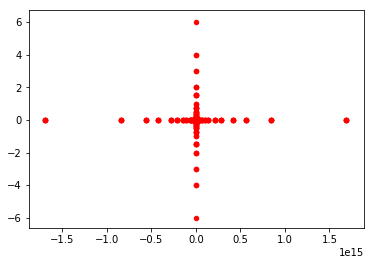

In [131]:
C = np.array([[2, 0], [0, 0.5]])
diag_m = np.diag(linalg.eig(C)[0])    #特征值对角化
def dynamic_sys(x, y):
    C_new_x = []
    C_new_y = []
    g = (i for i in range(50))
    for n in g:
        C_new = np.array([x, y]).dot(diag_m ** n).dot(linalg.eig(C)[1])
        plt.scatter(C_new[0], C_new[1], s = 20, c = 'r')
        
def iterate():
    g = ((x,y) for x in (-3, -1, 0, 1, 3) for y in (-3, -1, 0, 1, 3))
    for n in g:
        dynamic_sys(n[0], n[1])

fig = plt.figure()
iterate()
plt.show()

#### 复特征值对应旋转

D:\Anaconda\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


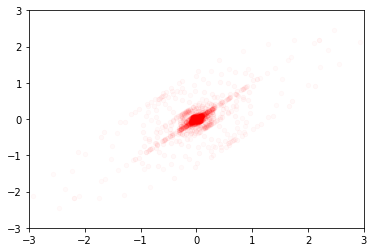

In [137]:
C = np.array([[0.8, 0.5], [-0.1, 1.0]])
diag_m = np.diag(linalg.eig(C)[0])    #特征值对角化
def dynamic_sys(x, y):
    C_new_x = []
    C_new_y = []
    g = (i for i in range(50))
    for n in g:
        C_new = np.array([x, y]).dot(diag_m ** n).dot(linalg.eig(C)[1])
        plt.scatter(C_new[0], C_new[1], s = 20, c = 'r', alpha = 1 / (50 - n))
        
def iterate():
    g = ((x,y) for x in range(-3, 4) for y in (-3, 0, 3))
    for n in g:
        dynamic_sys(n[0], n[1])

fig = plt.figure()
iterate()
plt.xlim((-3, 3))
plt.ylim((-3, 3))
plt.show()

## 对称矩阵求逆

In [27]:
A = np.array([[3, -2, 4], [-2, 6, 2], [4, 2, 3]])
Matrix(np.linalg.eig(A)[1]).T

⎡ 0.74535599249993   -0.298142396999972   0.596284793999944 ⎤
⎢                                                           ⎥
⎢-0.666666666666667  -0.333333333333333   0.666666666666667 ⎥
⎢                                                           ⎥
⎣-0.483717410333908  0.873975871018455   -0.0467294748246803⎦

In [28]:
Matrix(np.linalg.inv((np.linalg.eig(A)[1])))

⎡ 0.74535599249993   0.464809063666639   0.977760524333249⎤
⎢                                                         ⎥
⎢-0.666666666666667  -0.333333333333334  0.666666666666667⎥
⎢                                                         ⎥
⎣       0.0           1.1756253362927    0.587812668146348⎦

In [30]:
%%time
np.linalg.eig(A.T.dot(A))

Wall time: 2 ms


(array([ 49.,   4.,  49.]), array([[ 0.74535599, -0.66666667,  0.17626063],
        [-0.2981424 , -0.33333333,  0.79855406],
        [ 0.59628479,  0.66666667,  0.57553766]]))

## SVD

In [22]:
m = np.array([[3, -2, 4], [-2, 6, 2], [4, 2, 3]])
u, sigma, v = map(Matrix, np.linalg.svd(m))
u, sigma, v

/Users/lee_excited/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


⎛⎡-0.74535599249993   -4.32178186163577e-17  -0.666666666666667⎤  ⎡7.0⎤  ⎡-0.7
⎜⎢                                                             ⎥  ⎢   ⎥  ⎢    
⎜⎢0.298142396999972     0.894427190999916    -0.333333333333333⎥, ⎢7.0⎥, ⎢    
⎜⎢                                                             ⎥  ⎢   ⎥  ⎢    
⎝⎣-0.596284793999944    0.447213595499958    0.666666666666667 ⎦  ⎣2.0⎦  ⎣0.66

4535599249993  0.298142396999972  -0.596284793999944⎤⎞
                                                    ⎥⎟
   0.0         0.894427190999916  0.447213595499958 ⎥⎟
                                                    ⎥⎟
6666666666667  0.333333333333333  -0.666666666666667⎦⎠

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x10F3B3278>
(512, 512, 3)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


/Users/lee_excited/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


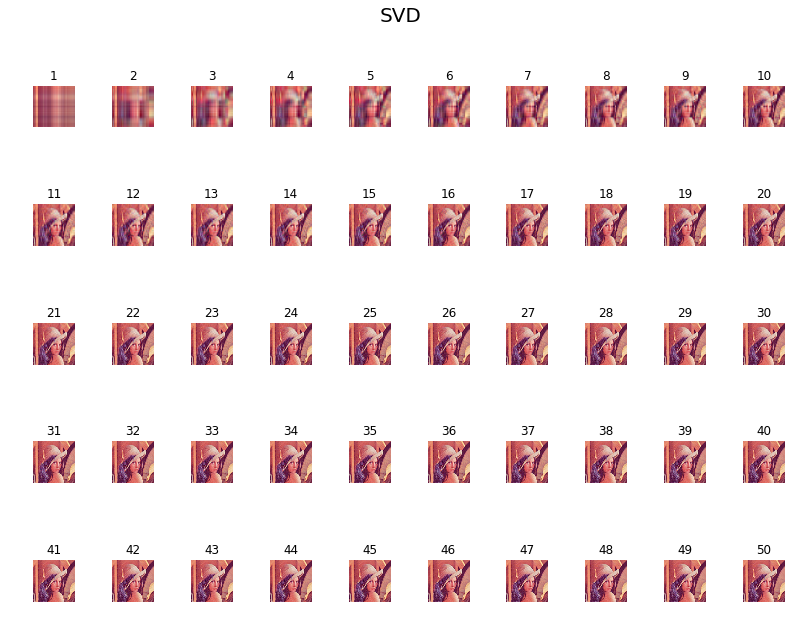

In [8]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
from pprint import pprint

'''
恢复函数，用于复原图像
sigma：特征值， u：左特征向量，v：右特征向，K：选取的奇异值个数
'''
def restore1(sigma, u, v, K):  # 奇异值、左特征向量、右特征向量
    m = len(u)
    n = len(v[0])
    a = np.zeros((m, n))    #图片化为numpy格式数组
    for k in range(K):
        uk = u[:, k].reshape(m, 1)       #取u值的第k列
        vk = v[k].reshape(1, n)          #取v值的第k行
        a += sigma[k] * np.dot(uk, vk)   #第k个奇异值
#     a[a < 0] = 0
#     a[a > 255] = 255   
    a = a.clip(0, 255)  #限定输出范围，作用同上两行
    return np.rint(a).astype('uint8')    #四舍五入转为整数


def restore2(sigma, u, v, K):  # 奇异值、左特征向量、右特征向量
    m = len(u)
    n = len(v[0])
    a = np.zeros((m, n))
    for k in range(K+1):
        for i in range(m):
            a[i] += sigma[k] * u[i][k] * v[k]
    a[a < 0] = 0
    a[a > 255] = 255
    return np.rint(a).astype('uint8')


if __name__ == "__main__":
    A = Image.open("lena.png", 'r')
    print(A)
    output_path = r'.\SVD_Output'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    a = np.array(A)
    print(a.shape)
    K = 50
    '''对rgb三个通道分别计算奇异值分解'''
    u_r, sigma_r, v_r = np.linalg.svd(a[:, :, 0])
    u_g, sigma_g, v_g = np.linalg.svd(a[:, :, 1])
    u_b, sigma_b, v_b = np.linalg.svd(a[:, :, 2])
    plt.figure(figsize=(11, 9), facecolor='w')
    mpl.rcParams['font.sans-serif'] = ['simHei']
    mpl.rcParams['axes.unicode_minus'] = False
    for k in range(1, K+1):
        print(k)
        R = restore1(sigma_r, u_r, v_r, k)
        G = restore1(sigma_g, u_g, v_g, k)
        B = restore1(sigma_b, u_b, v_b, k)
        I = np.stack((R, G, B), axis=2)    #堆叠
        Image.fromarray(I).save('%s\\svd_%d.png' % (output_path, k))
        if k <= 50:
            plt.subplot(5, 10, k)
            plt.imshow(I)
            plt.axis('off')
            plt.title(k)
    plt.suptitle('SVD', fontsize=20)
    plt.tight_layout(0.3, rect=(0, 0, 1, 0.92))
    # plt.subplots_adjust(top=0.9)
    plt.show()
